<a href="https://colab.research.google.com/github/Diacod-I/NNML-Lab/blob/main/clusterin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
filet = pd.read_csv("/content/assessments.csv")

In [ ]:
filet.dropna(inplace=True)

In [ ]:
code_mod=filet['code_module'].unique()
print("Classes of assessments :",filet['assessment_type'].unique())
print("Code modules :",code_mod)
print("Code Presentation :",filet['code_presentation'].unique())

Classes of assessments : ['TMA' 'CMA' 'Exam']
Code modules : ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
Code Presentation : ['2013J' '2014J' '2013B' '2014B']


In [ ]:
plt.style.use('dark_background')

In [ ]:
colors={'TMA':'lightblue','Exam':'tomato','CMA':'gold'}

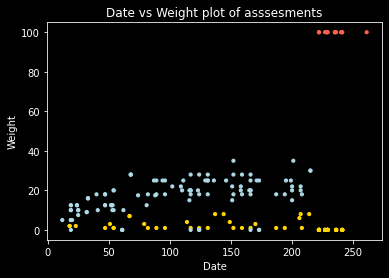

In [ ]:
plt.scatter(filet['date'],filet['weight'],c=filet['assessment_type'].map(colors),s=10)
plt.xlabel("Date")
plt.ylabel("Weight")
plt.title("Date vs Weight plot of asssesments")
plt.show()

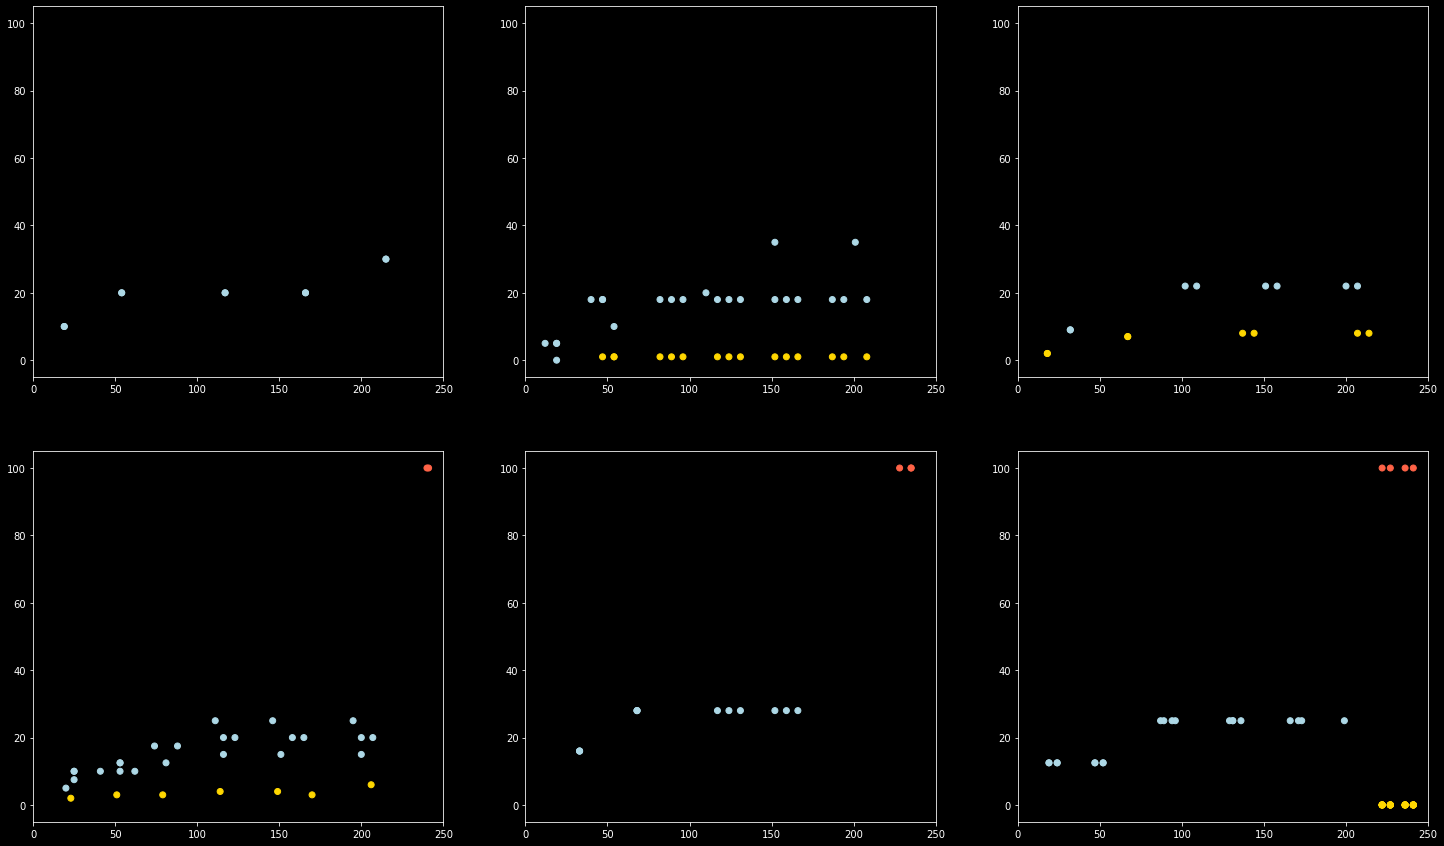

In [ ]:
fig,ax = plt.subplots(2,3,figsize=(25,15))
for i,numi in zip(ax,range(len(ax))):
  for j,numj in zip(i,range(len(i))):
    j.set_xlim((0,250))
    j.set_ylim((-5,105))
    j.scatter((filet[filet['code_module']==code_mod[(3*numi)+numj]]['date']),(filet[filet['code_module']==code_mod[(3*numi)+numj]]['weight']),c=(filet[filet['code_module']==code_mod[(3*numi)+numj]]['assessment_type'].map(colors)))

In [ ]:
codencode = {'AAA':0, 'BBB':1, 'CCC':2, 'DDD':3, 'EEE':4, 'FFF':5, 'GGG':6}
presencode = {'2013J':0, '2014J':1, '2013B':2, '2014B':3}

In [ ]:
chicken = filet.copy()

In [ ]:
chicken['code_module'] = chicken['code_module'].replace(codencode)

In [ ]:
chicken['code_presentation'] = chicken['code_presentation'].replace(presencode)

In [ ]:
chicken.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,0,0,1752,TMA,19.0,10.0
1,0,0,1753,TMA,54.0,20.0
2,0,0,1754,TMA,117.0,20.0
3,0,0,1755,TMA,166.0,20.0
4,0,0,1756,TMA,215.0,30.0


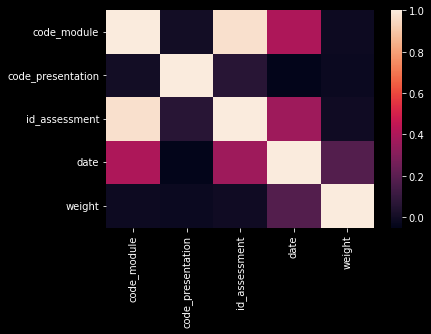

In [ ]:
sns.heatmap(chicken.iloc[0:-1,:].corr())
plt.show()

In [ ]:
np.cov(np.array(chicken.iloc[:,0:2]).T)

array([[ 3.67105472e+00, -1.98255353e-03],
       [-1.98255353e-03,  1.33359767e+00]])

In [ ]:
class LDA:
  def __init__(self,n_components=None):
    self.n_components= n_components
    self.discriminants = None

  def transform(self,X,Y):
    n_features = X.shape[1]
    class_label = np.unique(Y)
    #Within class scatter matrix: SW = sum((X_c - mean_X_c)^2)
    #Between class scatter: SB = sum(n_c*(mean_X_c - mean_overall)^2)
    mean_overall = np.mean(X,axis=0)
    print(f"Mean of columns for all classes:\n{mean_overall}\n")
    SW = np.zeros((n_features, n_features))
    SB = np.zeros((n_features, n_features))
    for c in class_label:
      X_c = X[Y==c]
      mean_c = np.mean(X_c,axis=0)
      print(f"Mean of columns for class {c}:\n{mean_c}\n")
      SW+=(X_c - mean_c).T.dot((X_c - mean_c))
      n_C = X_c.shape[0]
      mean_diff = (mean_c - mean_overall).reshape(n_features,1) #difference between mean of each vector class column wise and the mean of all classes columnwise
      SB +=n_C*(mean_diff).dot(mean_diff.T)
    
    A = np.linalg.inv(SW).dot(SB)
    eigenvalues,eigenvectors = np.linalg.eig(A)
    eigenvectors=eigenvectors.T
    print(f"\nMean Difference between class means and overall mean:\n{mean_diff}")
    print(f"\n\nWithin class scatter matrix:\n{SW}")
    print(f"\nEigenvalues of (SW^(-1))*SB:\n{eigenvalues}")
    print(f"\nEigenvectors of (SW^(-1))*SB:\n{eigenvectors}")


In [ ]:
X= pd.concat([chicken.iloc[:,0:2],chicken.iloc[:,-2:]],axis=1)
Y = chicken.iloc[:,3]

In [ ]:
X

,code_module,code_presentation,date,weight
0,0,0,19.0,10.0
1,0,0,54.0,20.0
2,0,0,117.0,20.0
3,0,0,166.0,20.0
4,0,0,215.0,30.0
...,...,...,...,...
201,6,1,229.0,0.0
202,6,1,61.0,0.0
203,6,1,124.0,0.0
204,6,1,173.0,0.0


In [ ]:
Y

0       TMA
1       TMA
2       TMA
3       TMA
4       TMA
       ... 
201     CMA
202     TMA
203     TMA
204     TMA
205    Exam
Name: assessment_type, Length: 195, dtype: object

In [ ]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2)

In [ ]:
LDAA = LDA(n_components=2)

In [ ]:
LDAA.transform(np.array(Xtrain),np.array(Ytrain))

Mean of columns for all classes:
[  3.38461538   1.44871795 142.79487179  16.40064103]

Mean of columns for class CMA:
[  3.74193548   1.64516129 177.40322581   1.30645161]

Mean of columns for class Exam:
[  4.54545455   1.18181818 234.81818182 100.        ]

Mean of columns for class TMA:
[  2.96385542   1.3373494  104.74698795  16.59638554]


Mean Difference between class means and overall mean:
[[ -0.42075996]
 [ -0.11136855]
 [-38.04788384]
 [  0.19574452]]


Within class scatter matrix:
[[ 5.43489807e+02 -1.17562803e+01  6.08078349e+03 -4.59307618e+02]
 [-1.17562803e+01  1.90384129e+02 -5.97681059e+02 -1.95685970e+00]
 [ 6.08078349e+03 -5.97681059e+02  5.98738242e+05  1.41213628e+04]
 [-4.59307618e+02 -1.95685970e+00  1.41213628e+04  6.70090634e+03]]

Eigenvalues of (SW^(-1))*SB:
[1.59461234e+01+0.00000000e+00j 4.61286800e-01+0.00000000e+00j
 1.04312931e-16+4.41309845e-16j 1.04312931e-16-4.41309845e-16j]

Eigenvectors of (SW^(-1))*SB:
[[-0.78303649+0.j          0.09601473+0.j    

In [ ]:
np.array(Xtrain).T

array([[  1. ,   5. ,   6. ,   4. ,   5. ,   6. ,   3. ,   3. ,   6. ,
          5. ,   1. ,   3. ,   1. ,   1. ,   5. ,   1. ,   5. ,   3. ,
          1. ,   1. ,   5. ,   2. ,   2. ,   6. ,   6. ,   4. ,   4. ,
          1. ,   5. ,   0. ,   1. ,   3. ,   1. ,   3. ,   5. ,   6. ,
          4. ,   4. ,   1. ,   4. ,   2. ,   5. ,   5. ,   1. ,   6. ,
          6. ,   3. ,   6. ,   3. ,   5. ,   5. ,   6. ,   5. ,   3. ,
          3. ,   5. ,   5. ,   1. ,   1. ,   0. ,   6. ,   6. ,   2. ,
          3. ,   0. ,   2. ,   0. ,   1. ,   1. ,   2. ,   5. ,   6. ,
          2. ,   0. ,   6. ,   1. ,   4. ,   2. ,   6. ,   3. ,   5. ,
          3. ,   6. ,   5. ,   3. ,   3. ,   5. ,   1. ,   5. ,   5. ,
          5. ,   3. ,   1. ,   1. ,   1. ,   1. ,   1. ,   3. ,   1. ,
          6. ,   1. ,   3. ,   5. ,   3. ,   5. ,   3. ,   4. ,   1. ,
          3. ,   1. ,   0. ,   5. ,   4. ,   4. ,   3. ,   1. ,   1. ,
          5. ,   5. ,   3. ,   6. ,   5. ,   3. ,   5. ,   3. ,   5. ,
      

In [1]:
Xtrain_mod = LDAA.transform(np.array(Xtrain),np.array(Ytrain))

NameError: ignored